# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

# Reading and Exploring data

In [3]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [8]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [9]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Preprocessing

## Feature Engineering

### Convert object columns with only 2 unique values to numeric

In [10]:
object_cols = df.select_dtypes(include='object').columns
two_unique_cols = [col for col in object_cols if df[col].nunique() == 2]
print(two_unique_cols)


['Street', 'Alley', 'Utilities', 'CentralAir']


In [11]:
print(df['Street'].unique())
print(df['Alley'].unique())
print(df['Utilities'].unique())
print(df['CentralAir'].unique())


['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['AllPub' 'NoSeWa']
['Y' 'N']


In [12]:
df['Street'] = df['Street'].map({'Pave': 1, 'Grvl': 0})
df['Alley'] = df['Alley'].map({'Grvl': 0, 'Pave': 1})
df['Utilities'] = df['Utilities'].map({'AllPub': 1, 'NoSewr': 0})
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})
df[['Street', 'Alley', 'Utilities', 'CentralAir']].head()

,Street,Alley,Utilities,CentralAir
0,1,NaN,1.0,1
1,1,NaN,1.0,1
2,1,NaN,1.0,1
3,1,NaN,1.0,1
4,1,NaN,1.0,1


### Convert Quality related columns to Numeric

In [13]:
# Function to convert Quality columns to numeric
def convert_quality(col):
  if col == 'Ex':
    return 5
  elif col == 'Gd':
    return 4
  elif col == 'TA':
    return 3
  elif col == 'Fa':
    return 2
  elif col == 'Po':
    return 1
  else:
    return 0

In [14]:
quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for col in quality_cols:
  df[col] = df[col].apply(convert_quality)

In [15]:
df[quality_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [16]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)


Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


### Handiling missing values

In [17]:
# drop columns with percentage of missing values > 40%
threshold = 0.40 * len(df)
dropped_df = df.copy()
for col in df.columns:
    if dropped_df[col].isnull().sum() > threshold:
        print(f"Dropped column: {col}")
        dropped_df.drop(col,axis=1, inplace=True)

Dropped column: Alley
Dropped column: MasVnrType
Dropped column: Fence
Dropped column: MiscFeature


In [18]:
dropped_df.drop('Id', axis=1, inplace=True)

In [19]:
numerical_features = dropped_df.select_dtypes(include=['int64', 'float64'])
print("count of numerical features = ",numerical_features.columns.size)

#categorical features
categorical_features = dropped_df.select_dtypes(include=['object'])
print("count of categorical features = ",categorical_features.columns.size)

count of numerical features =  50
count of categorical features =  26


In [20]:
numerical_with_missing = [feature for feature in numerical_features if dropped_df.isnull().sum().get(feature, 0) > 0]

categorical_with_missing = [feature for feature in categorical_features if dropped_df.isnull().sum().get(feature, 0) > 0]

print(f"Number of numerical features with missing values: {len(numerical_with_missing)}")
print(f"Number of categorical features with missing values: {len(categorical_with_missing)}")

Number of numerical features with missing values: 4
Number of categorical features with missing values: 6


In [21]:
missing_cols_num = numerical_features.columns[numerical_features.isnull().any()].tolist()
print(f'numerical missing columns: {missing_cols_num}')

missing_cols_cat = categorical_features.columns[categorical_features.isnull().any()].tolist()
print(f'categorical missing columns: {missing_cols_cat}')


numerical missing columns: ['LotFrontage', 'Utilities', 'MasVnrArea', 'GarageYrBlt']
categorical missing columns: ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish']


In [22]:
#imputing numerical columns with median in traindf
imputer_num = SimpleImputer(strategy='median')
dropped_df[missing_cols_num] = imputer_num.fit_transform(dropped_df[missing_cols_num])

In [23]:
#imputing categorical columns with 'None' in traindf
imputer_cat = SimpleImputer(strategy='constant', fill_value='None')
dropped_df[missing_cols_cat] = imputer_cat.fit_transform(dropped_df[missing_cols_cat])

In [24]:
dropped_df.isnull().sum()[dropped_df.isnull().sum() > 0].sort_values(ascending=False)

,0


### Handling Outliers

In [25]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

numerical_df = dropped_df.select_dtypes(include=['number'])
outlier_counts = numerical_df.apply(count_outliers)

sorted_outliers = outlier_counts.sort_values(ascending=False)

In [26]:
for column in numerical_df:
    Q1 = dropped_df[column].quantile(0.25)
    Q3 = dropped_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dropped_df[column] = dropped_df[column].mask(dropped_df[column] < lower_bound, lower_bound)
    dropped_df[column] = dropped_df[column].mask(dropped_df[column] > upper_bound, upper_bound)

### Visulize correlation

Text(0.5, 1.0, 'Correlation of Numeric Features with SalePrice')

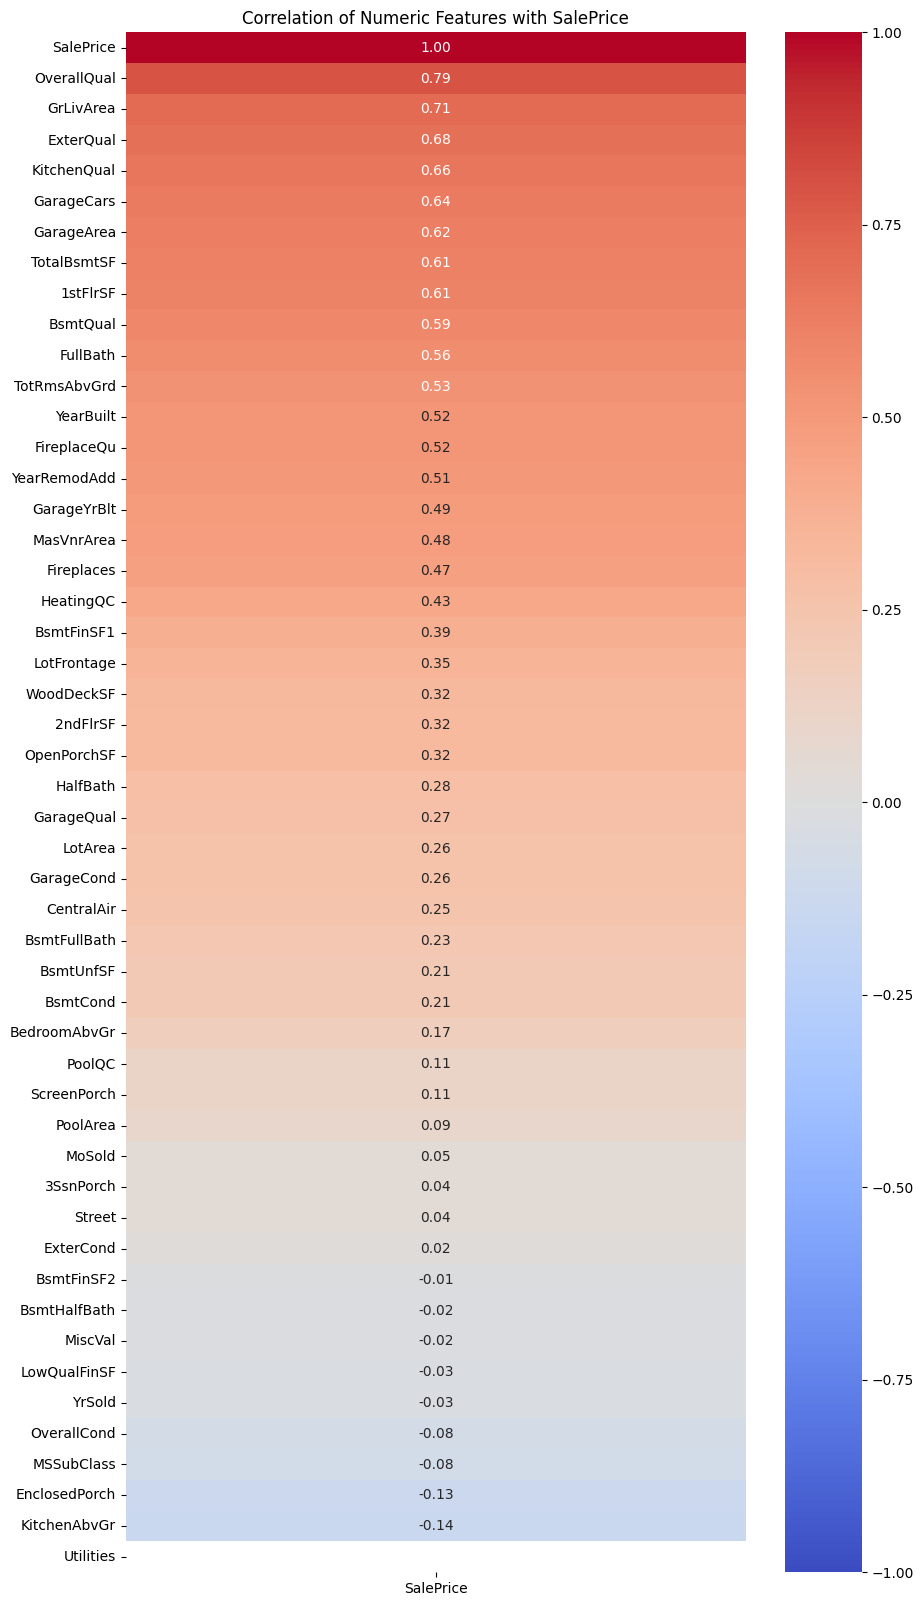

In [27]:
correlations = numerical_features.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# Plot heatmap of correlations
plt.figure(figsize=(10, 20))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Numeric Features with SalePrice')

**Drop Columns with weak correlation**

In [28]:
weak_corr_cols = correlations[(correlations['SalePrice'] < 0.1) & (correlations['SalePrice'] > -0.1)].index.tolist()
print(weak_corr_cols)
dropped_df.drop(weak_corr_cols, axis=1, inplace=True)

['PoolArea', 'MoSold', '3SsnPorch', 'Street', 'ExterCond', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass']


 ### Data Transformation

**Encoding Categorical Variables into numerical values using one-hot encoding.**

In [29]:
#categorical features
categorical_features = dropped_df.select_dtypes(include=['object'])
print("count of categorical features = ",categorical_features.columns.size)

count of categorical features =  26


In [30]:
# The pd.get_dummies() function is applied to the DataFrame, creating dummy variables for each categorical feature.

df_transformed = pd.get_dummies(dropped_df)
df_transformed.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,1.0,7,2003,2003,196.0,4,4.0,3,...,False,False,False,True,False,False,False,False,True,False
1,80.0,9600.0,1.0,6,1976,1976,0.0,3,4.0,3,...,False,False,False,True,False,False,False,False,True,False


# Modeling

### Identify Features and Lables

In [31]:
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.9062417294409948
MSE: 458407621.41867214


### Testing Linear Regression with Polynomial Features

In [35]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Fit Linear Regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = lr_poly.predict(X_test_poly)

# Evaluate performance
print(f"R2 score (Polynomial Features): {r2_score(y_test, y_pred_poly)}")
print(f"MSE (Polynomial Features): {mean_squared_error(y_test, y_pred_poly)}")

R2 score (Polynomial Features): -2.606071476045561
MSE (Polynomial Features): 17630984852.258396


### Ridge Regression

In [36]:
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print(f"R2 score (Ridge): {r2_score(y_test, y_pred_ridge)}")
print(f"MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge)}")


R2 score (Ridge): 0.913419244381738
MSE (Ridge): 423314956.71756226


*Ridge Regression have a better preformance*

### Using Grid search to find best param

In [38]:
# Define the parameter grid to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train a Ridge model with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(x_train, y_train)

# Predict on test data
y_pred_best_ridge = best_ridge.predict(x_test)

# Evaluate performance
print(f"R2 score (Best Ridge): {r2_score(y_test, y_pred_best_ridge)}")
print(f"MSE (Best Ridge): {mean_squared_error(y_test, y_pred_best_ridge)}")

Best alpha: 10
R2 score (Best Ridge): 0.9196677664745376
MSE (Best Ridge): 392764370.26940835


In [39]:
# save ridge model
import joblib
joblib.dump(best_ridge, 'ridge_model.pkl')


['ridge_model.pkl']